In [1]:
 # Dependencies
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Adding options to display all of the rows of DataFrame w/o truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
gdp_df = pd.read_csv('GDP_last_50.csv')
gdp_df = gdp_df.drop(['Series Name', 'Series Code'], axis=1)
# gdp_df.replace({'..': 'NaN'}, regex=True)
# gdp_df = gdp_df/10e9
# gdp_df.head()

In [3]:
gdp_df.head()

,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,1748886595.55556,1831108971.11111,1595555475.55556,1733333264.44444,2155555497.77778,2366666615.55556,2555555566.66667,2953333417.77778,3300000108.88889,3697940409.61098,3641723321.99546,3478787909.09091,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,4055176933.36905,4515563413.82564,5226775163.30205,6209140044.00519,6971286731.72065,9747886104.53251,10109218067.7904,12439087076.7667,15856574731.4411,17804280538.1102,20001615788.6719,20561054090.3995,20484873230.2111,19907111418.9938,19362642266.6484,20191764940.1602,19362969582.3643,..
1,Albania,ALB,..,..,..,..,..,..,..,..,..,..,..,..,..,..,1857338011.85488,1897050133.42015,2097326250,2080796250,2051236250,2253090000,2028553750,1099559027.77778,652174990.837304,1185315468.46295,1880951520.3972,2392764853.42107,3199642579.96974,2258515610.08862,2545967253.2416,3212119044.17089,3480355188.60063,3922099470.97313,4348070165.19261,5611492282.86582,7184681398.5698,8052075642.10781,8896073938.31407,10677321490.3807,12881353984.6426,12044223457.8287,11926962834.9645,12890867535.5568,12319784701.3346,12776277648.9159,13228244336.3241,11386927679.0875,11861353752.0672,13025064966.5784,15102500898.238,..
2,Algeria,DZA,4863487492.65763,5077222366.97472,6761786386.54713,8715105930.49101,13209713643.3219,15557934268.4965,17728347374.994,20971901273.271,26364491313.4471,33243422157.6311,42345277342.0195,44348672667.8715,45207088715.6483,48801369800.3675,53698278905.9678,57937868670.1937,63696301892.8116,66742267773.1959,59089067187.3943,55631489801.5508,62045099642.7774,45715367087.1001,48003298223.1178,49946455210.966,42542571305.5136,41764052457.8814,46941496779.8499,48177862501.9495,48187747528.899,48639108360.6213,54786074940.2073,54743249368.646,56758113501.1671,67866141223.5933,85324767230.4939,103198442061.076,117030941571.939,134978727825.851,170997541140.985,137214821177.358,161205065469.309,200015355528.47,209062886917.045,209754763860.68,213808808746.696,165978425168.386,160032930353.764,167390266100.763,173757952824.25,..
3,American Samoa,ASM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,514000000,527000000,512000000,503000000,496000000,520000000,563000000,678000000,576000000,574000000,644000000,641000000,642000000,661000000,652000000,602000000,636000000,..
4,Andorra,AND,78619206.0850963,89409820.3592814,113408231.944085,150820102.798401,186558696.279204,220127246.376812,227281024.620741,254020153.340635,308008897.569444,411578334.159643,446416105.825017,388958731.302938,375895956.383462,327861832.946636,330070689.298282,346737964.774951,482000594.03588,611316399.407088,721425939.15155,795449332.396346,1029048481.88051,1106928582.86629,1210013651.87713,1007025755.00065,1017549124.33238,1178738991.19295,1223945356.62682,1180597272.72727,1211932397.81713,1239876305.13531,1434429703.33518,1496912751.67785,1733116883.11688,2398645598.19413,2935659299.72684,3255789080.96008,3543256805.92147,4016972351.49192,4007353156.58415,3660530702.97305,3355695364.23841,3442062830.13622,3164615186.94591,3281585236.32501,3350736367.25488,2811489408.89431,2877311946.90265,3013387423.93509,3236543909.34844,..


In [4]:
list(gdp_df.columns)
gdp_country_df = gdp_df[['Country Name', 'Country Code']]
gdp_yearly_df = gdp_df[list(gdp_df.columns)[2:]]

gdp_yearly_df = gdp_yearly_df.replace('..',np.nan)
gdp_yearly_df = gdp_yearly_df.apply(pd.to_numeric)

# Convert to US$ in Billions
gdp_yearly_df = gdp_yearly_df/10E9

# Combine the country and gdp data
gdp_clean_df = pd.concat([gdp_country_df, gdp_yearly_df], axis=1)

gdp_clean_df.head()

,Country Name,Country Code,1970 [YR1970],1971 [YR1971],1972 [YR1972],1973 [YR1973],1974 [YR1974],1975 [YR1975],1976 [YR1976],1977 [YR1977],1978 [YR1978],1979 [YR1979],1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],1986 [YR1986],1987 [YR1987],1988 [YR1988],1989 [YR1989],1990 [YR1990],1991 [YR1991],1992 [YR1992],1993 [YR1993],1994 [YR1994],1995 [YR1995],1996 [YR1996],1997 [YR1997],1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,0.330000,0.369794,0.364172,0.347879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405518,0.451556,0.522678,0.620914,0.697129,0.974789,1.010922,1.243909,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185734,0.189705,0.209733,0.208080,0.205124,0.225309,0.202855,0.109956,0.065217,0.118532,0.188095,0.239276,0.319964,0.225852,0.254597,0.321212,0.348036,0.392210,0.434807,0.561149,0.718468,0.805208,0.889607,1.067732,1.288135,1.204422,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,2.636449,3.324342,4.234528,4.434867,4.520709,4.880137,5.369828,5.793787,6.369630,6.674227,5.908907,5.563149,6.204510,4.571537,4.800330,4.994646,4.254257,4.176405,4.694150,4.817786,4.818775,4.863911,5.478607,5.474325,5.675811,6.786614,8.532477,10.319844,11.703094,13.497873,17.099754,13.721482,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051400,0.052700,0.051200,0.050300,0.049600,0.052000,0.056300,0.067800,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,0.030801,0.041158,0.044642,0.038896,0.037590,0.032786,0.033007,0.034674,0.048200,0.061132,0.072143,0.079545,0.102905,0.110693,0.121001,0.100703,0.101755,0.117874,0.122395,0.118060,0.121193,0.123988,0.143443,0.149691,0.173312,0.239865,0.293566,0.325579,0.354326,0.401697,0.400735,0.366053,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN


In [5]:
# Rename YEAR columns
# Create a dictionary to update year titles in the column headers
a_dict={}
year_headers = (list(gdp_clean_df)[2:])
for year in year_headers:
    a_dict.update({year:year[0:4]})
gdp_clean_df = gdp_clean_df.rename(columns=a_dict)
gdp_clean_df.head()

,Country Name,Country Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,0.174889,0.183111,0.159556,0.173333,0.215556,0.236667,0.255556,0.295333,0.330000,0.369794,0.364172,0.347879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405518,0.451556,0.522678,0.620914,0.697129,0.974789,1.010922,1.243909,1.585657,1.780428,2.000162,2.056105,2.048487,1.990711,1.936264,2.019176,1.936297,NaN
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.185734,0.189705,0.209733,0.208080,0.205124,0.225309,0.202855,0.109956,0.065217,0.118532,0.188095,0.239276,0.319964,0.225852,0.254597,0.321212,0.348036,0.392210,0.434807,0.561149,0.718468,0.805208,0.889607,1.067732,1.288135,1.204422,1.192696,1.289087,1.231978,1.277628,1.322824,1.138693,1.186135,1.302506,1.510250,NaN
2,Algeria,DZA,0.486349,0.507722,0.676179,0.871511,1.320971,1.555793,1.772835,2.097190,2.636449,3.324342,4.234528,4.434867,4.520709,4.880137,5.369828,5.793787,6.369630,6.674227,5.908907,5.563149,6.204510,4.571537,4.800330,4.994646,4.254257,4.176405,4.694150,4.817786,4.818775,4.863911,5.478607,5.474325,5.675811,6.786614,8.532477,10.319844,11.703094,13.497873,17.099754,13.721482,16.120507,20.001536,20.906289,20.975476,21.380881,16.597843,16.003293,16.739027,17.375795,NaN
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051400,0.052700,0.051200,0.050300,0.049600,0.052000,0.056300,0.067800,0.057600,0.057400,0.064400,0.064100,0.064200,0.066100,0.065200,0.060200,0.063600,NaN
4,Andorra,AND,0.007862,0.008941,0.011341,0.015082,0.018656,0.022013,0.022728,0.025402,0.030801,0.041158,0.044642,0.038896,0.037590,0.032786,0.033007,0.034674,0.048200,0.061132,0.072143,0.079545,0.102905,0.110693,0.121001,0.100703,0.101755,0.117874,0.122395,0.118060,0.121193,0.123988,0.143443,0.149691,0.173312,0.239865,0.293566,0.325579,0.354326,0.401697,0.400735,0.366053,0.335570,0.344206,0.316462,0.328159,0.335074,0.281149,0.287731,0.301339,0.323654,NaN


In [6]:
round(gdp_clean_df.describe(),3)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,128.000,129.000,129.000,129.000,130.000,132.000,133.000,137.000,136.000,137.000,146.000,149.000,150.000,151.000,152.000,153.000,156.000,159.000,162.000,162.000,177.000,176.000,177.000,180.000,182.000,189.000,189.000,189.000,191.000,192.000,198.000,198.000,203.000,203.000,204.000,205.000,205.000,206.000,205.000,205.000,205.000,206.000,205.000,207.000,206.000,205.000,204.000,201.000,195.000,0.0
mean,2.192,2.404,2.775,3.385,3.872,4.259,4.596,5.043,5.991,6.907,7.315,7.424,7.303,7.399,7.620,7.961,9.227,10.356,11.713,12.213,12.705,13.356,14.089,14.109,14.982,16.143,16.496,16.430,16.241,16.750,16.762,16.678,16.898,18.972,21.287,22.946,24.884,27.916,30.777,29.193,31.951,35.337,36.326,37.007,38.190,36.068,36.776,39.658,43.134,NaN
std,9.997,10.863,12.106,13.850,15.033,16.379,18.007,19.940,23.370,26.100,27.628,29.685,30.241,32.452,35.403,37.799,41.868,45.672,50.306,52.967,54.368,57.585,61.395,64.296,68.626,72.677,73.034,74.194,75.873,80.586,83.755,84.315,85.626,91.203,98.138,103.642,109.310,115.998,121.530,119.509,126.542,135.667,141.808,146.100,153.086,156.598,160.820,170.508,185.062,NaN
min,0.001,0.002,0.002,0.002,0.003,0.003,0.003,0.003,0.004,0.004,0.004,0.003,0.003,0.004,0.004,0.003,0.003,0.003,0.004,0.004,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.002,0.002,0.002,0.002,0.002,0.002,0.003,0.003,0.003,0.004,0.004,0.004,0.004,0.004,0.004,0.004,0.004,NaN
25%,0.032,0.036,0.041,0.052,0.057,0.069,0.073,0.075,0.092,0.108,0.115,0.111,0.103,0.107,0.105,0.108,0.120,0.127,0.150,0.150,0.202,0.200,0.179,0.174,0.162,0.188,0.228,0.226,0.197,0.192,0.174,0.168,0.182,0.232,0.281,0.301,0.345,0.425,0.478,0.458,0.490,0.558,0.554,0.555,0.543,0.483,0.492,0.585,0.735,NaN
50%,0.156,0.169,0.197,0.247,0.295,0.305,0.328,0.325,0.371,0.442,0.472,0.522,0.477,0.492,0.472,0.474,0.492,0.553,0.564,0.526,0.595,0.674,0.646,0.587,0.590,0.672,0.737,0.765,0.748,0.769,0.820,0.822,0.778,0.868,1.023,1.196,1.450,1.718,1.975,1.865,2.027,2.371,2.550,2.527,2.722,2.344,2.407,2.679,3.441,NaN
75%,0.899,0.918,0.966,1.384,1.631,1.749,1.775,1.984,2.377,2.794,3.243,3.451,3.190,3.103,3.362,3.120,3.398,3.939,4.041,4.246,4.402,4.341,4.596,4.741,5.081,5.331,5.525,5.815,5.505,5.807,5.318,5.396,5.577,6.401,7.594,8.606,10.748,12.652,14.740,12.082,14.658,17.094,18.683,19.484,20.082,17.750,17.812,20.259,22.004,NaN
max,107.330,116.485,127.911,142.538,154.524,168.490,187.341,208.183,235.160,262.733,285.731,320.704,334.379,363.404,403.761,433.898,457.963,485.522,523.644,564.158,596.314,615.813,652.033,685.856,728.724,763.975,807.312,857.755,906.282,963.066,1025.235,1058.182,1093.642,1145.824,1221.373,1303.664,1381.461,1445.186,1471.284,1444.893,1499.205,1554.258,1619.701,1678.485,1752.175,1821.930,1870.719,1948.539,2054.434,NaN


In [7]:
# drop last 5 all NaN rows becuase there is no data in there
gdp_clean_df = gdp_clean_df.dropna(how = 'all')

In [8]:
gdp_usa = gdp_clean_df[gdp_clean_df['Country Code'] == 'USA']

In [19]:
data = gdp_usa.groupby(['Country Name', 'Country Code']).first()
xaxis=[_ for _ in range(0,50,1)]

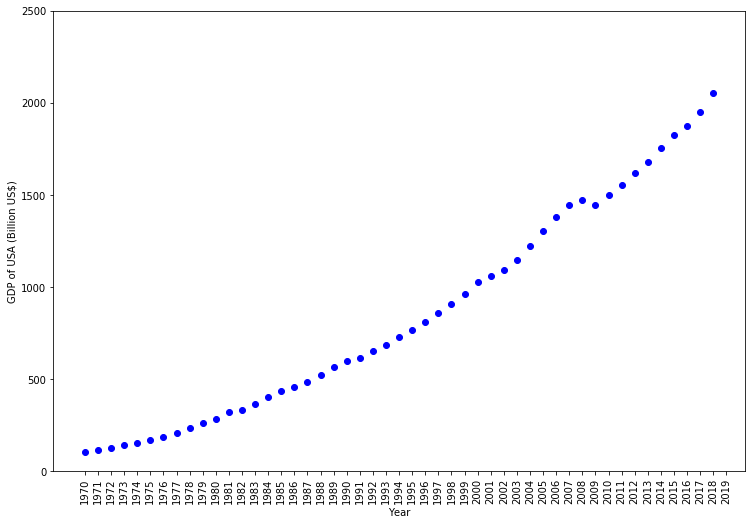

In [60]:
fig= plt.figure(figsize=(12,8))

axes= fig.add_axes([0.1,0.1,0.8,0.8])

x= xaxis

y=data.T

axes.plot(x,y,'bo')
plt.ylim([0,2500])
plt.xticks(xaxis, labels = list(gdp_usa.columns)[2:], rotation = 90)
plt.xlabel('Year')
plt.ylabel('GDP of USA (Billion US$)')
plt.show()

# plt.plot(xaxis,data.T,'bo')
# plt.xticks(xaxis, list(gdp_usa.columns)[2:], rotation = 90);
# plt.ylim([0, 2500]);